## 패키지 및 데이터 불러오기 

In [1]:
import numpy as np   # numpy 패키지 불러오기 
import pandas as pd  # pandas 패키지 불러오기 
import matplotlib  # matplotlib 패키지 불러오기 
import matplotlib.pyplot as plt # 그래프 시각화를 위한 패키지 불러오기
import seaborn as sns  # seaborn 패키지 불러오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 
from matplotlib import font_manager, rc  # matplotlib안 한글 깨짐 처리
import platform   # 현재 사용하고 있는 시스템 유형을 알려주는 패키지 
import plotly.express as px  # 더 나은 시각화를 위해 plotly 패키지 불러오기 
import seaborn as sns
%matplotlib inline

# 운영체제에 맞게 폰트 설정
if platform.system() == "Windows":
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시
warnings.filterwarnings(action='ignore') # 경고 매세지 강제로 없애주는 설정

In [2]:
data = pd.read_csv('./TV_GRPs_by_models.csv')

In [3]:
# 광고주를 기준으로 광고횟수, GRP, 도달자수, 시청자수를 각각 더함.
idx_ad = data[["Advertiser","GRP","광고횟수","도달자수","시청자수"]].copy().groupby("Advertiser").sum()

In [4]:
# 평균 시청률 
data['평균시청률'] = data['GRP'] / data['광고횟수']

In [5]:
# 평균 노출빈도 구하기 
data['평균노출빈도'] = data['GRP'] / data['도달율 1+']
data['평균노출빈도'].fillna(0, inplace=True)
data['평균노출빈도'].replace(np.inf, 0, inplace=True)
data.tail()

,Unnamed: 0,date,Year,Month,Advertiser,Product,Brand,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
6289,6289,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,30대,498,767415,20.8,535073,14.5,1.5,0.2,0.1,0.1,0.041767,1.434483
6290,6290,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,40대,498,1581617,38.4,890827,21.6,4.4,0.2,0.0,0.0,0.077108,1.777778
6291,6291,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,50대,498,3023227,73.9,1370128,33.5,9.9,2.2,0.8,0.4,0.148394,2.205970
6292,6292,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,60대,498,5377999,106.1,2194754,43.3,15.8,5.3,1.9,0.7,0.213052,2.450346
6293,6293,2021-4,2021,4,혼다코리아,혼다CR-V,혼다,개인,498,11827075,49.1,5573971,23.1,6.5,1.7,0.6,0.2,0.098594,2.125541


In [6]:
# 광고주와 연령대를 기준으로 그룹화 (평균 기준)
ad_age = data.groupby(["Advertiser", "연령대"]).agg('mean').round(6)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
ad_age.tail()

,Advertiser,연령대,GRP,평균시청률,평균노출빈도
127,혼다코리아,30대,28.196429,0.434702,1.525901
128,혼다코리아,40대,50.917857,0.773733,1.840891
129,혼다코리아,50대,58.366071,0.860406,1.964544
130,혼다코리아,60대,55.069643,0.664354,1.921900
131,혼다코리아,개인,38.912500,0.546491,1.834624


In [7]:
# 광고주, Product, 연도, 연령대별 광고횟수, GRP, 도달지수, 시청자수
apya = data[["Advertiser","Product","Year","연령대", "광고횟수","GRP","도달자수","시청자수"]].copy().groupby(["Advertiser","Product","Year","연령대"]).mean().reset_index()
apya = apya.astype({"도달자수":int, "시청자수":int})
apya.drop(apya[apya["연령대"]=="개인"].index)

,Advertiser,Product,Year,연령대,광고횟수,GRP,도달자수,시청자수
0,BMW코리아,BMW3시리즈,2019,20대,814.4,31.56,380731,1069815
1,BMW코리아,BMW3시리즈,2019,30대,814.4,61.32,785572,2328816
2,BMW코리아,BMW3시리즈,2019,40대,814.4,110.98,1206770,4713253
3,BMW코리아,BMW3시리즈,2019,50대,814.4,107.38,1192444,4260110
4,BMW코리아,BMW3시리즈,2019,60대,814.4,79.62,1070082,3606191
...,...,...,...,...,...,...,...,...
1806,혼다코리아,혼다파일럿,2019,20대,251.5,33.40,522724,1131385
1807,혼다코리아,혼다파일럿,2019,30대,251.5,64.40,1042328,2445939
1808,혼다코리아,혼다파일럿,2019,40대,251.5,119.40,1663696,5071028
1809,혼다코리아,혼다파일럿,2019,50대,251.5,108.70,1535110,4310834


In [8]:
from Plot import Plot

In [20]:
plot = Plot()

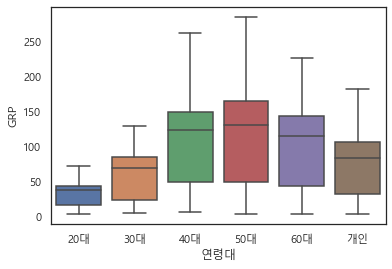

In [12]:
plot.boxplot(ad_age, '연령대', 'GRP') # inplacesubplot을 설정 X

In [13]:
plot.boxplot(ad_age, '연령대', 'GRP', inplacesubplot=131) # inplacesubplot을 설정 O

In [14]:
plot.boxplot(ad_age, '연령대', '평균노출빈도', inplacesubplot=132)

In [15]:
plot.boxplot(ad_age, '연령대', '평균시청률', inplacesubplot=133)

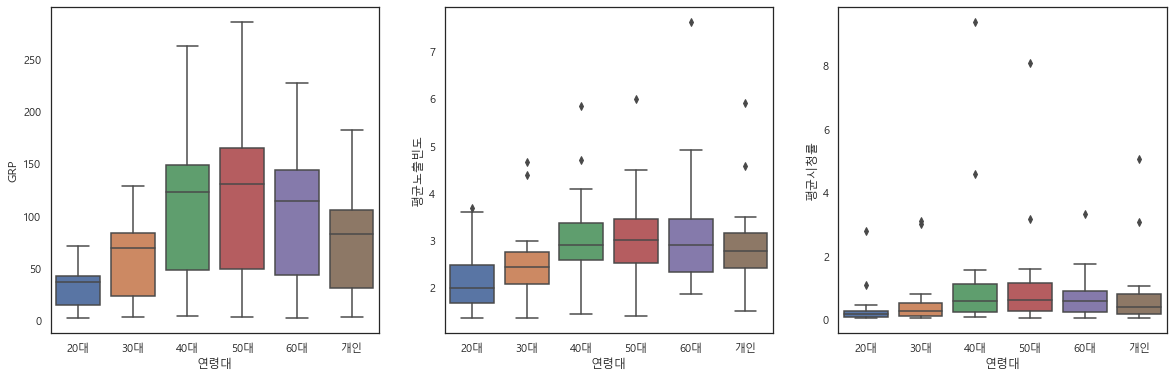

In [16]:
plot.showplot() # inplacesubplot으로 모아서 한번에 출력 가능

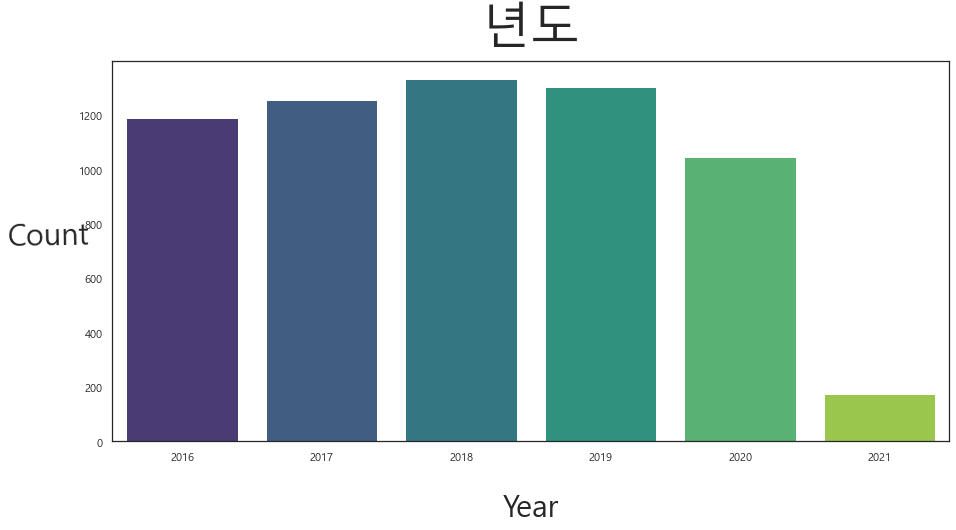

In [17]:
plot.countplot(data, "년도", "Year") # inplacesubplot 설정X

In [22]:
plot.countplot(data, "년도", "Year", inplacesubplot=221)

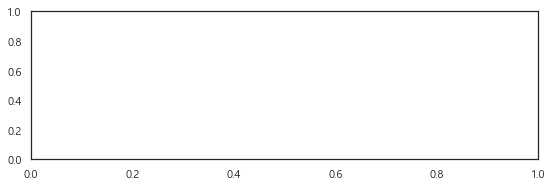

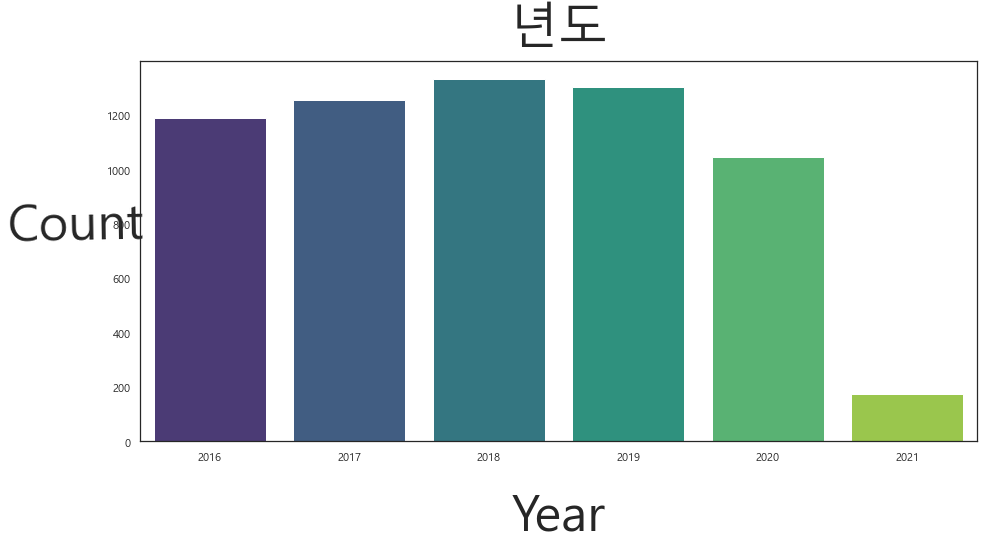

In [23]:
plot.showplot() # 카운터 플롯은 오류가 있음.... 이유는 모르겠어요 ㅜㅜㅜㅜㅜㅜㅜ

In [ ]:
# 스케터플롯은 px 라서 어떻게 추가할지 고민중입니다.